**Gurvir Boparai, 217797457**

**Ishan Ojha, 216474868**

# Problem Statement:
The problem we aim to address is the necessity of early detection of heart failure in individuals, which can be crucial for their overall health and well-being. By leveraging machine learning techniques to analyze clinical features and build a predictive model, we seek to classify individuals as being at risk of experiencing heart failure. This model aims to assist healthcare professionals in identifying at-risk individuals sooner, enabling timely interventions and potentially improving patient outcomes.

## 1. Loading the dataset
Load the csv file from the data folder into a pandas dataframe, then visualize the first 5 rows.

In [2]:
import pandas as pd

# load the dataset
df = pd.read_csv('data/heart.csv')

# display the first 5 rows
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2. Exploring the data
Taking a look at what the data looks like, as well visualizing our data with different plots.

In [3]:
# print concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# generate descriptive statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Splitting the numeric and categorical features to further look at plots

In [5]:
# create lists of features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Look at histograms of our numeric features

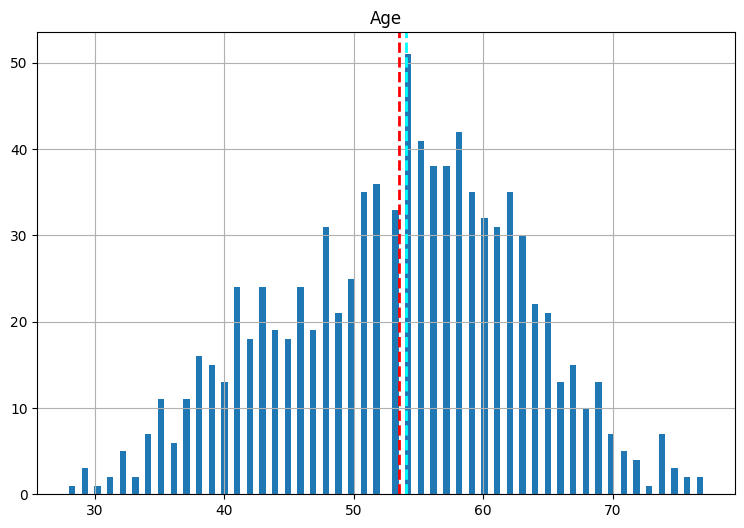

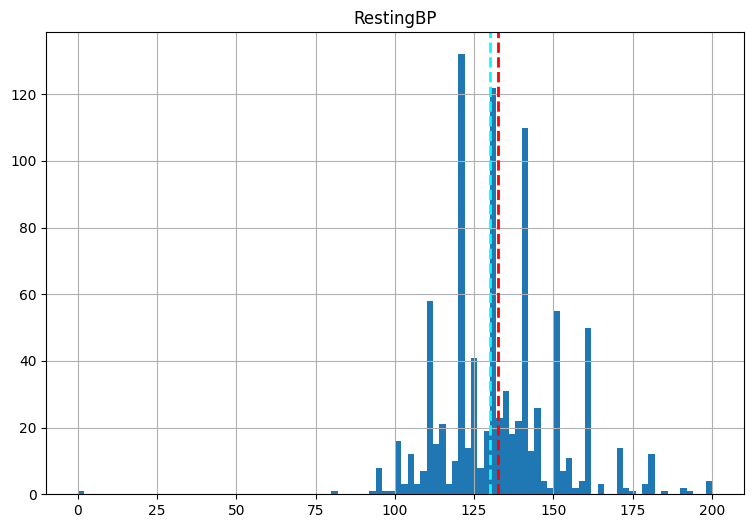

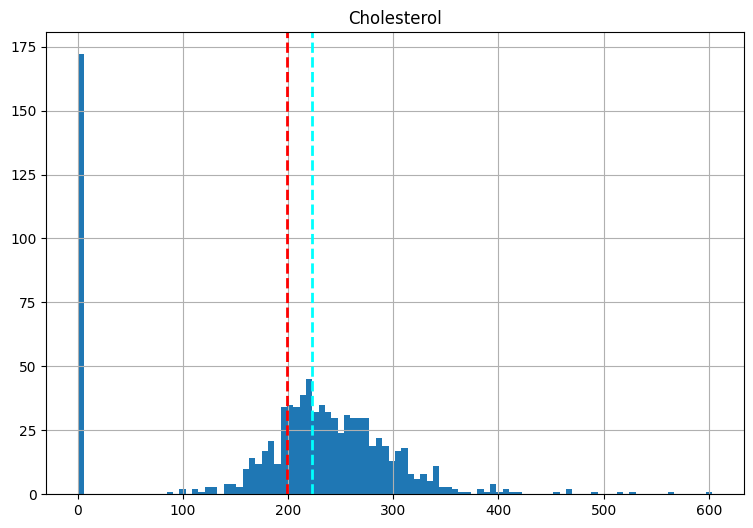

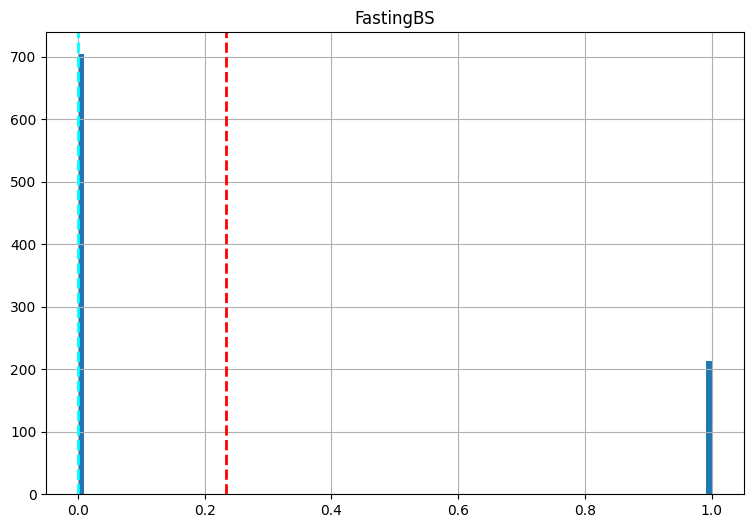

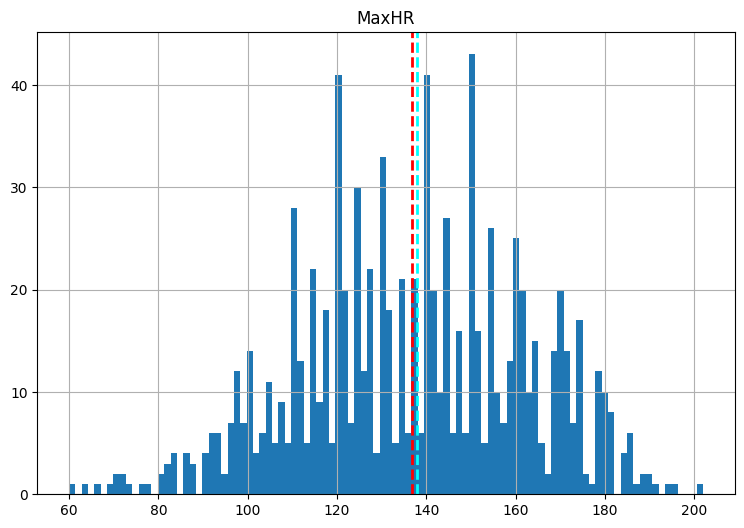

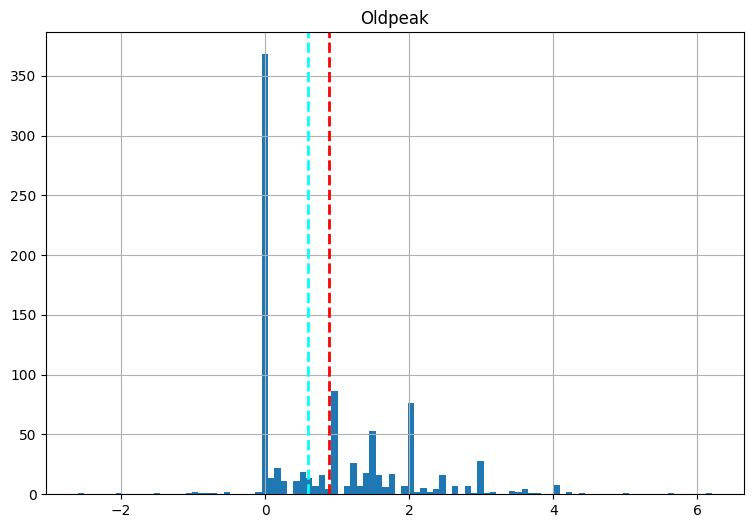

In [6]:
import matplotlib.pyplot as plt

# create a function to plot each feature
def plot_histogram(df, col):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col] # store column names from our dataframe
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2) # the mean line which will be red
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) # the median line which will be cyan
    ax.set_title(col)

# this will display a histogram for each of the numeric features listed in the data
for col in numeric_features:
    plot_histogram(df, col)

Create boxplots for further investigation of our numeric features, this time we group by HeartDisease (0 meaning Normal, 1 meaning Heart Disease)

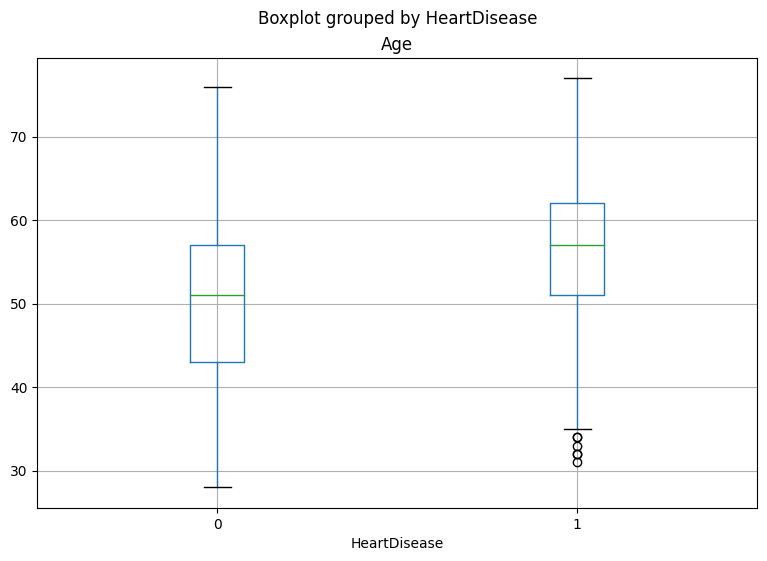

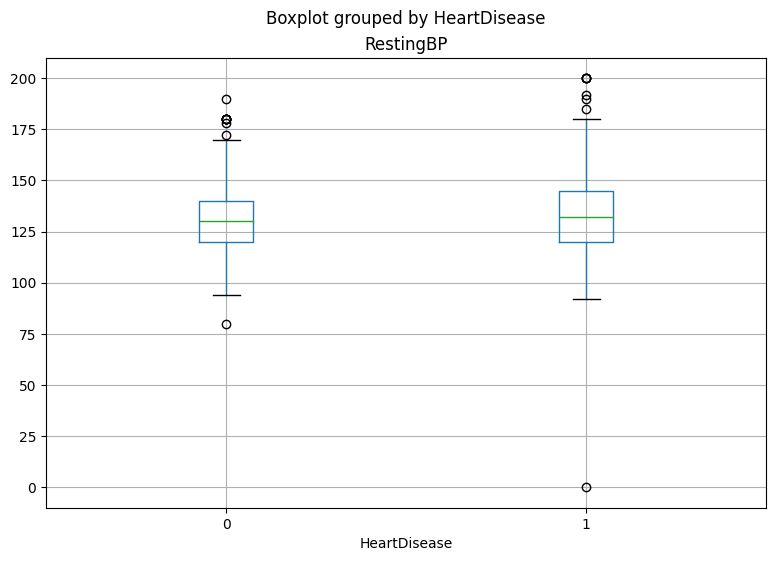

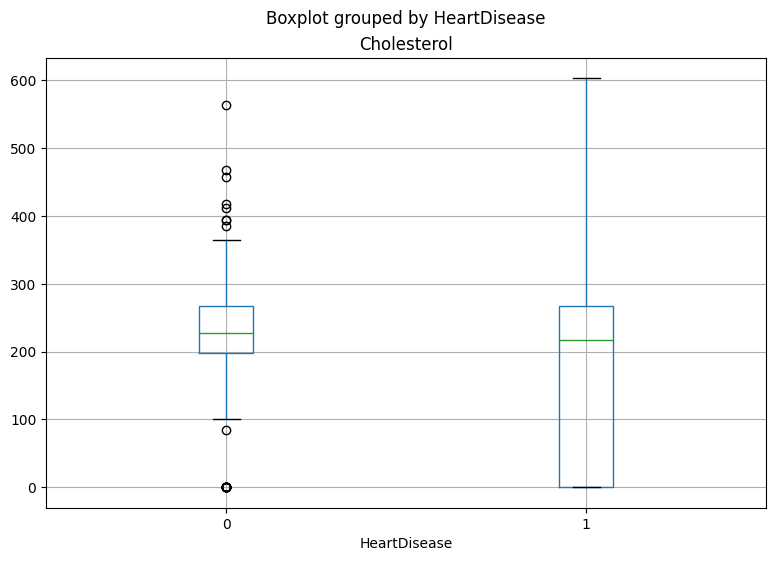

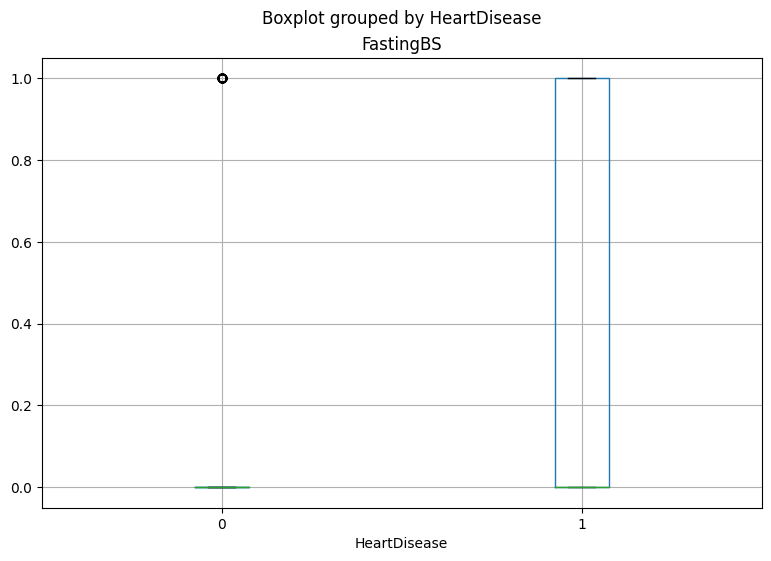

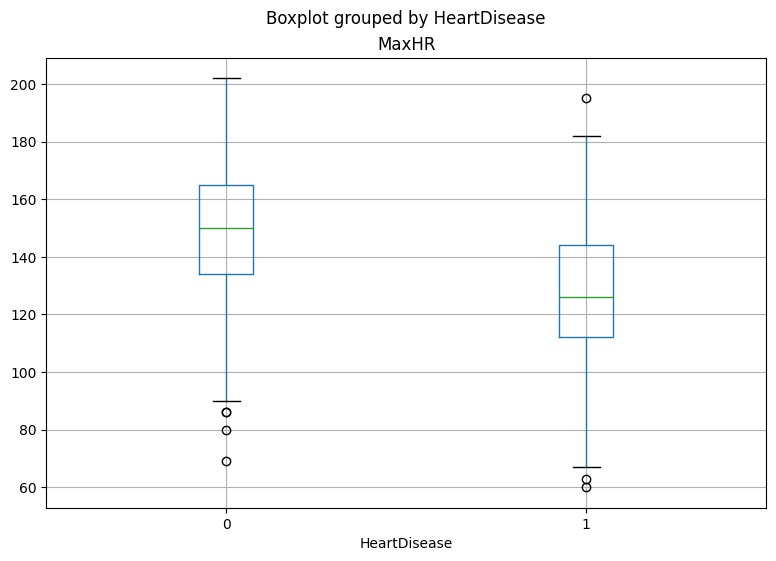

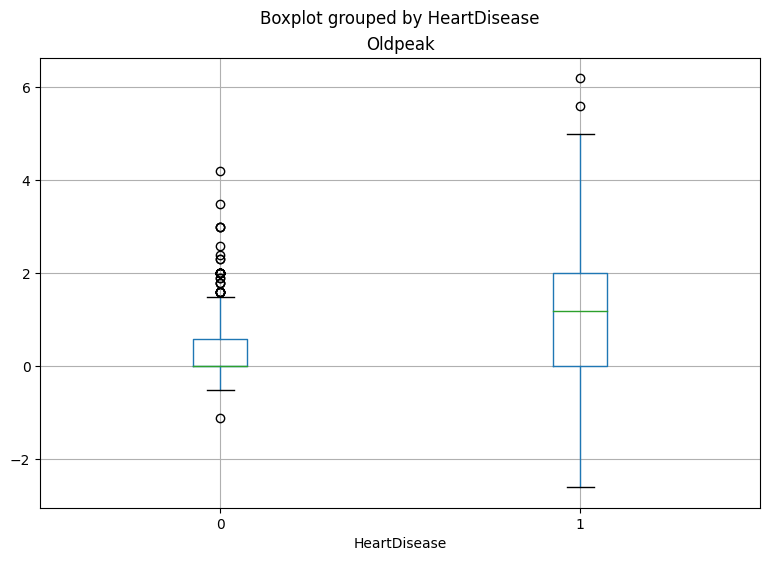

In [7]:
# create a function to plot each feature
def plot_boxplot(df, col):
    fig = plt.figure(figsize=(9, 6)) # create a new figure
    ax = fig.gca() # gets the axes of the figure 
    df.boxplot(column=col, by="HeartDisease", ax=ax) # create boxplot grouped by HeartDisease
    plt.title(col)
    plt.show()

# loop through each numeric feature and display a boxplot grouped by HeartDisease
for col in numeric_features:
    plot_boxplot(df, col)

Using barcharts to compare our categorical variables grouped by HeartDisease (0 meaning Normal, 1 meaning Heart Disease)

Red on the chart indicates heart disease, whereas cyan indicates normal.

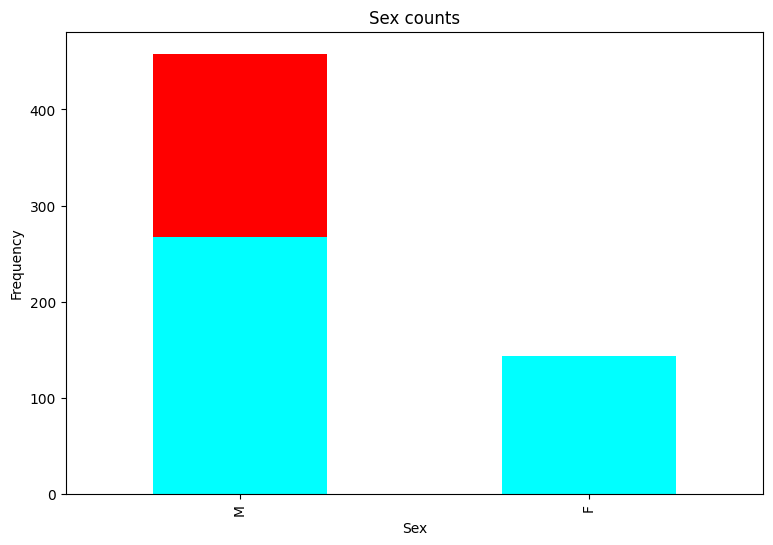

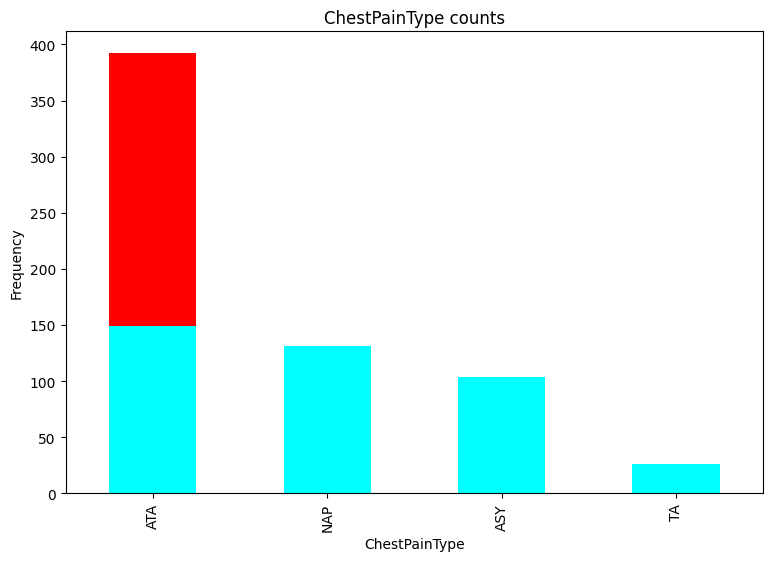

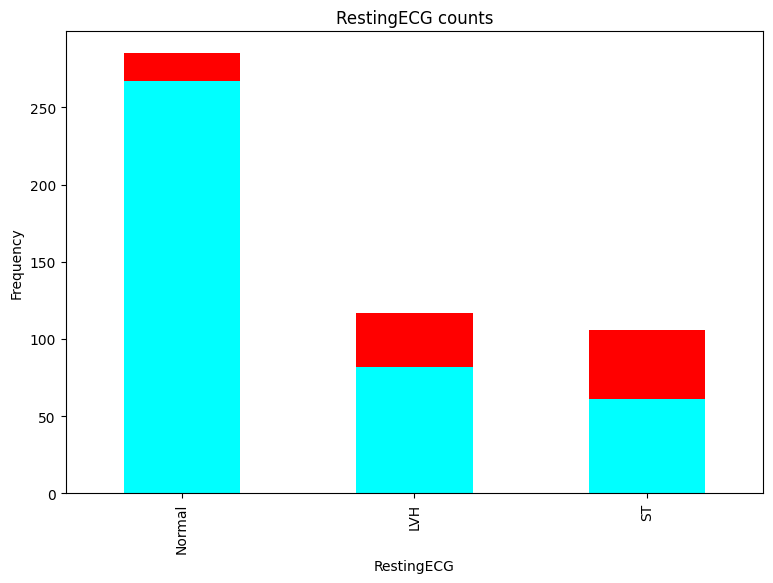

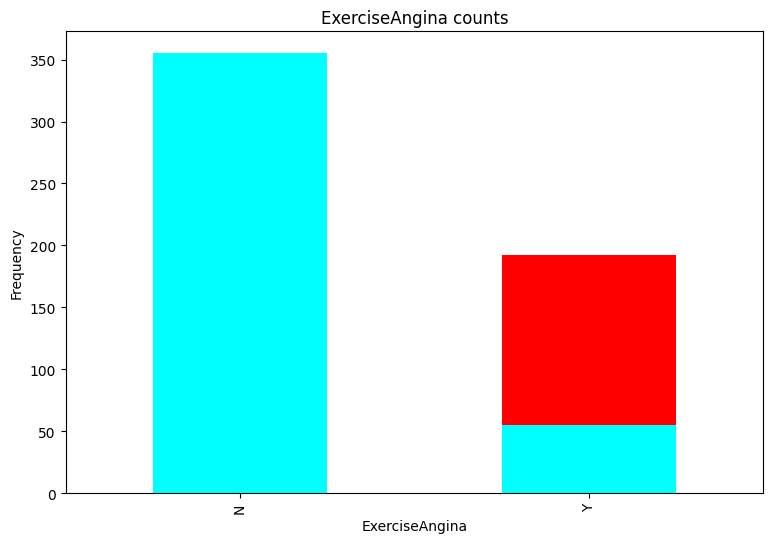

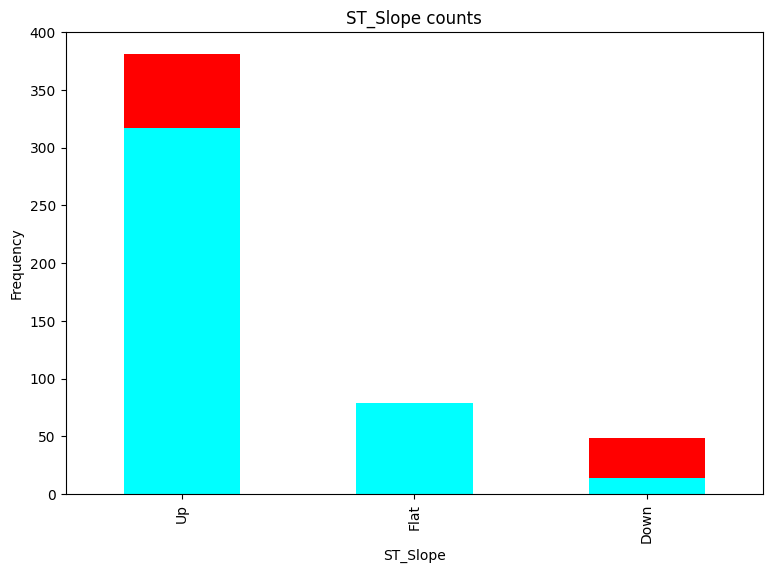

In [8]:
# create a function to plot each feature
def plot_barchart(df, col):
    heartDisease = df[df['HeartDisease'] == 1][col].value_counts()
    normal = df[df['HeartDisease'] == 0][col].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    heartDisease.plot.bar(ax = ax, color='red')
    normal.plot.bar(ax = ax, color='cyan')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

# loop through each categorical feature and display a bar chart of counts for each category
for col in categorical_features:
    plot_barchart(df, col)

Find relationship between columns using clusters

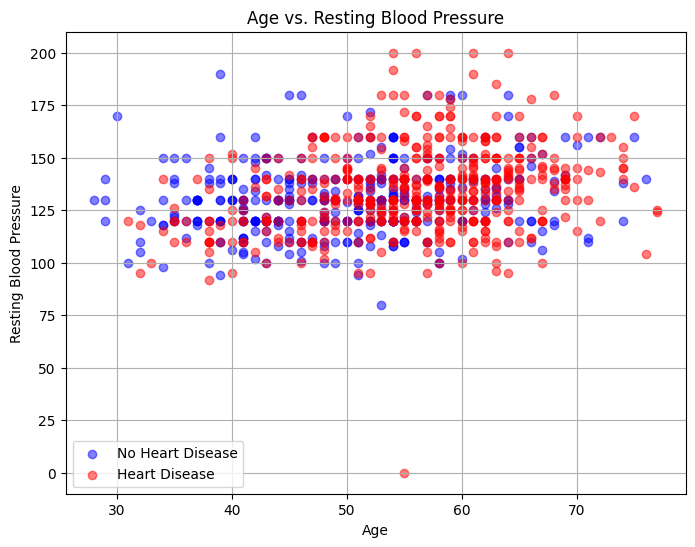

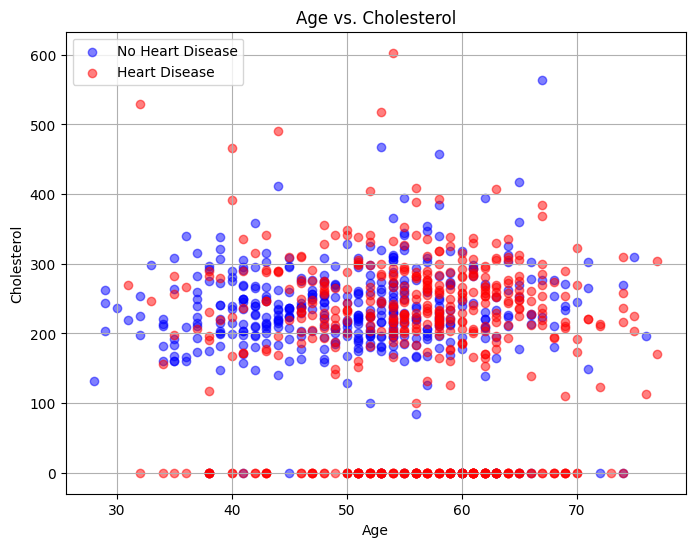

In [9]:
age = df['Age']
resting_bp = df['RestingBP']
heart_disease = df['HeartDisease']
chol = df['Cholesterol']
heart_disease = df['HeartDisease']

# Plotting Age vs. RestingBP
plt.figure(figsize=(8, 6))
plt.scatter(age[heart_disease == 0], resting_bp[heart_disease == 0], color='blue', alpha=0.5, label='No Heart Disease')
plt.scatter(age[heart_disease == 1], resting_bp[heart_disease == 1], color='red', alpha=0.5, label='Heart Disease')
plt.title('Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.grid(True)
plt.show()


# Plotting Age vs. Cholesterol
plt.figure(figsize=(8, 6))
plt.scatter(age[heart_disease == 0], chol[heart_disease == 0], color='blue', alpha=0.5, label='No Heart Disease')
plt.scatter(age[heart_disease == 1], chol[heart_disease == 1], color='red', alpha=0.5, label='Heart Disease')
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend()
plt.grid(True)
plt.show()

Let's take a look at correlation between different the numeric variables

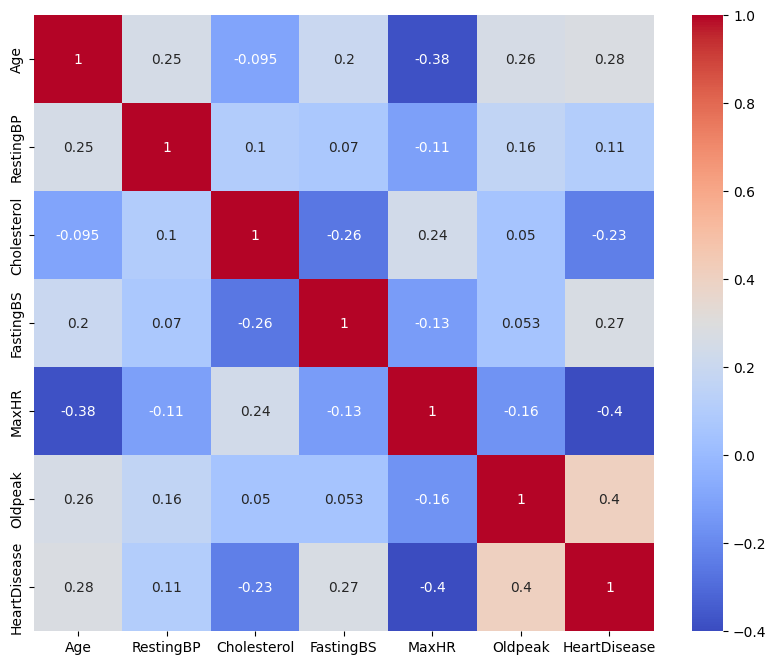

In [10]:
import numpy as np
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



---

**Some key takeaways from our exploratory step**

- There are some outliers in each variable, particularly in RestingBP, Cholesterol, FastingBS, and Oldpeak, indicating that a small number of individuals have extreme values for these variables.
- 'Male' for sex, 'ATA' for chest pain type, 'LVH' and 'ST' for Resting ECG, 'Yes' for exercise-induced angina, 'Up' or 'Down' ST slope could indicate a higher risk of heart disease.
- The correlation matrix suggests that several factors, including age, restingbs, oldpeak may be associated with heart disease risk.


---

## 3. Preprocessing Data
We will clean and solve potential issues in the data.

In [11]:
# handle missing values
print(df.isnull().sum()) # get the count of any null points in the data

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Handle outliers using the IQR

In [12]:
# Calculate the IQR for each numeric feature
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for IQR (e.g., 1.5) to identify outliers
outlier_threshold_iqr = 1.5

# Create a mask for outliers using IQR
outliers_iqr = ((df[numeric_features] < (Q1 - outlier_threshold_iqr * IQR)) |
                (df[numeric_features] > (Q3 + outlier_threshold_iqr * IQR)))

# Remove the outliers from the dataset
df_no_outlier = df[~outliers_iqr.any(axis=1)]

df_no_outlier.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,588.000000,588.000000,588.000000,588.0,588.000000,588.000000,588.000000
mean,51.722789,130.375850,239.064626,0.0,141.755102,0.802211,0.426871
std,9.542500,15.238699,50.738558,0.0,24.144890,0.961727,0.495044
min,28.000000,92.000000,85.000000,0.0,71.000000,-0.100000,0.000000
25%,44.750000,120.000000,205.000000,0.0,124.000000,0.000000,0.000000
50%,52.000000,130.000000,234.000000,0.0,142.000000,0.300000,0.000000
75%,58.000000,140.000000,272.000000,0.0,160.000000,1.500000,1.000000
max,77.000000,170.000000,404.000000,0.0,202.000000,3.600000,1.000000


## 4. Algorithm Deployment
We will take a look at our chosen algorithms: SVM, Random Forest, KNN, and Regression. 

In [13]:
# import libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Instantiate the target variable
target = 'HeartDisease'

# Apply the outlier mask to the DataFrame
df_no_outlier = df[~outliers_iqr.any(axis=1)]

# Split the data into features and target
X = df_no_outlier.drop(columns=[target])
y = df_no_outlier[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Support Vector Machines (SVM)

In [14]:
# import SVM
from sklearn.svm import SVC

# SVM classifier
svm_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', SVC(kernel='rbf', random_state=42))])

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred_train = svm_classifier.predict(X_train)
y_pred_test = svm_classifier.predict(X_test)

# Evaluation metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print()

print('Confusion Matrix:\n', cm, '\n')
print("Accuracy:", test_accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)

Train Accuracy: 0.9000
Test Accuracy: 0.8983

Confusion Matrix:
 [[63  5]
 [ 7 43]] 

Accuracy: 0.8983050847457628
Overall Precision: 0.8958333333333334
Overall Recall: 0.86


Random Forest

In [15]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Train KNN classifier
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print()

print('Confusion Matrix:\n', cm, '\n')
print("Accuracy:", test_accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)

Train Accuracy: 1.0000
Test Accuracy: 0.8814

Confusion Matrix:
 [[63  5]
 [ 9 41]] 

Accuracy: 0.8813559322033898
Overall Precision: 0.8913043478260869
Overall Recall: 0.82


K-Nearest Neighbors (KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn_classifier = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', KNeighborsClassifier(n_neighbors=5))])

# Train KNN classifier
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

cm = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print()

print('Confusion Matrix:\n', cm, '\n')
print("Accuracy:", test_accuracy)
print("Overall Precision:", precision)
print("Overall Recall:", recall)

Train Accuracy: 0.8681
Test Accuracy: 0.8983

Confusion Matrix:
 [[65  3]
 [ 9 41]] 

Accuracy: 0.8983050847457628
Overall Precision: 0.9318181818181818
Overall Recall: 0.82


Regression

In [17]:
# import regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression Model
linear_regression = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', LinearRegression())])

# Train KNN classifier
linear_regression.fit(X_train, y_train)

# Predictions
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

# Mean Squared Error - Evaluation Metric
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train Mean Squared Error: {train_mse:.4f}")
print(f"Test Mean Squared Error: {test_mse:.4f}")


Train Mean Squared Error: 0.1104
Test Mean Squared Error: 0.0915


## 5. Conclusion


After training and testing our chosen algorithms (SVM, Random Forest, KNN, and Regression) on the dataset, we can compare their performance based on the accuracy scores, confusion matrices, and other metrics.

Starting with SVM, we achieved a training accuracy of 90% and a test accuracy of 89.83%. The confusion matrix shows that SVM correctly classified 63 out of 68 samples from class 0 and 43 out of 50 samples from class 1. The overall precision is 89.58% and the overall recall is 86%.

Next, we have Random Forest, which achieved a perfect training accuracy of 100% but a slightly lower test accuracy of 88.14%. The confusion matrix shows that Random Forest correctly classified 63 out of 68 samples from class 0 and 41 out of 50 samples from class 1. The overall precision is 89.13% and the overall recall is 82%.

KNN, on the other hand, achieved a training accuracy of 86.81% and a test accuracy of 89.83%, which is the same as SVM. The confusion matrix shows that KNN correctly classified 65 out of 68 samples from class 0 and 41 out of 50 samples from class 1. The overall precision is 93.18% and the overall recall is 82%.

Lastly, we have Regression, which is a different type of algorithm compared to the other three. Instead of predicting classes, Regression predicts continuous values. The training mean squared error is 0.1104 and the test mean squared error is 0.0915.

Comparing the four algorithms, SVM and KNN have the highest test accuracy of 89.83%, while Random Forest has a slightly lower test accuracy of 88.14%. However, SVM and KNN have a higher overall precision of 89.58% and 93.18%, respectively, compared to Random Forest's 89.13%. On the other hand, Random Forest has a higher overall recall of 82% compared to SVM and KNN's 86% and 82%, respectively.

In summary, SVM and KNN perform similarly in terms of accuracy and precision, while Random Forest has a slightly lower accuracy but a higher recall. Regression, on the other hand, predicts continuous values instead of classes. The choice of algorithm depends on the specific use case and the trade-off between precision and recall.